In [1]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [2]:

data = load_iris()

X = data.data

y = data.target

In [3]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
# 4. Valuta la performance del modello usando l'accuratezza

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuratezza del modello: {accuracy:.2f}")

Accuratezza del modello: 1.00


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



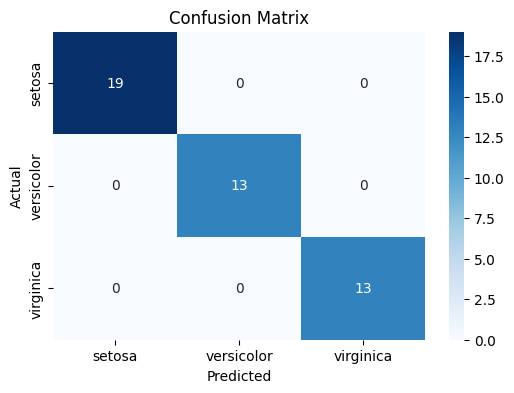

In [6]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

# 1. Carica il dataset Iris

data = load_iris()

X = data.data

y = data.target


# 2. Standardizza le caratteristiche utilizzando StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


# 3. Suddividi i dati in training e test set (70% training, 30% test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# 4. Applica l'algoritmo DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)


# 5. Valuta la performance del modello utilizzando il classification_report

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=data.target_names)

print("Classification Report:\n", report)


# 6. Visualizza la matrice di confusione

cm = confusion_matrix(y_test, y_pred)


# Visualizzazione della matrice di confusione

plt.figure(figsize=(6,4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',

            xticklabels=data.target_names,

            yticklabels=data.target_names)

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

c:\Users\39327\OneDrive\Documenti\GitHub\Brescia_DepositoCorso\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\39327\OneDrive\Documenti\GitHub\Brescia_DepositoCorso\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\39327\OneDrive\Documenti\GitHub\Brescia_DepositoCorso\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\U

                    model              setting  mean_accuracy  std_accuracy  \
0           XGBClassifier  max_depth=3, lr=0.1       0.946667      0.026667   
1  RandomForestClassifier            100 trees       0.966667      0.021082   
2                     SVC             RBF, C=1       0.966667      0.021082   
3      LogisticRegression        max_iter=2000       0.960000      0.038873   

   precision    recall        f1       MSE      RMSE  
0   0.946389  0.946667  0.946464  0.053333  0.230940  
1   0.966787  0.966667  0.966663  0.033333  0.182574  
2   0.966787  0.966667  0.966663  0.033333  0.182574  
3   0.960000  0.960000  0.960000  0.040000  0.200000  


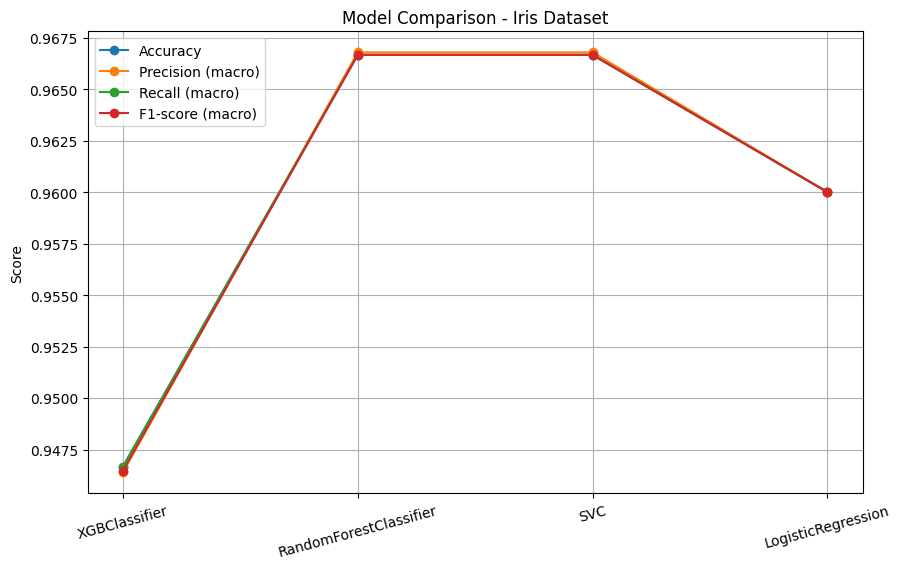

In [8]:
# ---------------------------------------------------------
# IMPORT
# ---------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (
    accuracy_score, mean_squared_error,
    precision_score, recall_score, f1_score
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ---------------------------------------------------------
# LOAD + SCALE DATASET IRIS
# ---------------------------------------------------------
data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

# ---------------------------------------------------------
# FUNCTION TO EVALUATE MULTICLASS MODELS
# ---------------------------------------------------------
def evaluate_model_multiclass(model, X, y, setting_name):
    # Accuracy (5-fold CV)
    acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_acc = acc_scores.mean()
    std_acc = acc_scores.std()

    # Predizioni per metriche
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Regression-like metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # Classification metrics (macro-average per multi-class)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')

    return {
        "model": model.__class__.__name__,
        "setting": setting_name,
        "mean_accuracy": mean_acc,
        "std_accuracy": std_acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "MSE": mse,
        "RMSE": rmse
    }

# ---------------------------------------------------------
# RUN MODELS
# ---------------------------------------------------------
results = []

results.append(evaluate_model_multiclass(
    XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1, objective='multi:softmax', num_class=3, eval_metric='mlogloss'),
    X, y,
    "max_depth=3, lr=0.1"
))

results.append(evaluate_model_multiclass(
    RandomForestClassifier(n_estimators=300, random_state=42),
    X, y,
    "100 trees"
))

results.append(evaluate_model_multiclass(
    SVC(kernel='rbf', C=1, probability=True),
    X, y,
    "RBF, C=1"
))

results.append(evaluate_model_multiclass(
    LogisticRegression(max_iter=2000, multi_class='auto'),
    X, y,
    "max_iter=2000"
))

# ---------------------------------------------------------
# CREATE DATAFRAME
# ---------------------------------------------------------
df_results = pd.DataFrame(results)
print(df_results)

# ---------------------------------------------------------
# PLOT COMPARATIVO
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(df_results["model"], df_results["mean_accuracy"], marker='o', label="Accuracy")
plt.plot(df_results["model"], df_results["precision"], marker='o', label="Precision (macro)")
plt.plot(df_results["model"], df_results["recall"], marker='o', label="Recall (macro)")
plt.plot(df_results["model"], df_results["f1"], marker='o', label="F1-score (macro)")

plt.title("Model Comparison - Iris Dataset")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.xticks(rotation=15)
plt.show()
